In [12]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('./input.csv')

In [14]:
df.head()

,ImageId,PinNumber,VisualResultType,Result,logic1,logic2,logic3,logic4,logic5,logic6,logic7,logic8,logic9,logic10
0,1,1,0,0,14,14,36,40,19,9,7,21,35,26
1,2,2,0,0,62,34,26,27,12,37,27,52,54,33
2,3,2,0,0,54,40,12,19,34,9,27,19,38,18
3,4,3,0,0,34,15,38,29,10,16,35,18,30,50
4,5,2,0,0,33,32,44,48,11,9,31,0,16,30


In [15]:
X = df.iloc[:, (df.columns.get_loc('Result')+1):]
y = df.iloc[:, (df.columns.get_loc('Result'))]
label = X.columns

In [16]:
# t-SNE
from sklearn.manifold import TSNE

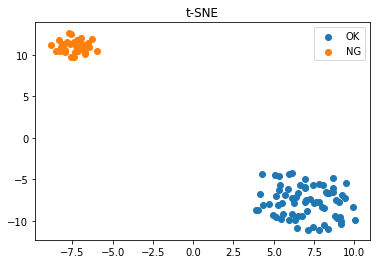

In [17]:
X_reduced = TSNE(n_components=2, random_state=0).fit_transform(X)
df_reduced = pd.DataFrame(X_reduced, columns=['x', 'y'])
df2 = pd.concat([df, df_reduced], axis=1)
lst2 = df2.columns.tolist()
lst2.remove('x')
lst2.remove('y')
lst2.insert(0, 'x')
lst2.insert(1, 'y')
df2[lst2].to_csv('./output.csv', index=False)
x0, y0 = X_reduced[y==0, 0], X_reduced[y==0, 1]
x1, y1 = X_reduced[y==1, 0], X_reduced[y==1, 1]
plt.figure()
plt.scatter(x0, y0, label='OK')
plt.scatter(x1, y1, label='NG')
plt.title('t-SNE')
plt.legend(loc='best')

In [23]:
df2[lst2].head()

,x,y,ImageId,PinNumber,VisualResultType,Result,logic1,logic2,logic3,logic4,logic5,logic6,logic7,logic8,logic9,logic10
0,7.416788,-10.769449,1,1,0,0,14,14,36,40,19,9,7,21,35,26
1,5.399107,-5.642412,2,2,0,0,62,34,26,27,12,37,27,52,54,33
2,7.038887,-8.757418,3,2,0,0,54,40,12,19,34,9,27,19,38,18
3,6.970800,-5.978512,4,3,0,0,34,15,38,29,10,16,35,18,30,50
4,9.215796,-6.899699,5,2,0,0,33,32,44,48,11,9,31,0,16,30


In [18]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

In [19]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X, y)
rf_importances = rf_clf.feature_importances_
rf_indices=np.argsort(rf_importances)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [20]:
# XGBoost
from xgboost.sklearn import XGBClassifier

In [21]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X, y)
xgb_importances = xgb_clf.feature_importances_
xgb_indices = np.argsort(xgb_importances)

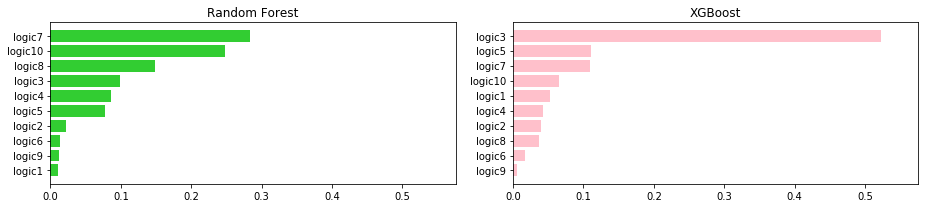

In [22]:
num=10
upper = max(max(rf_importances), max(xgb_importances))*1.1
fig, ax = plt.subplots(1, 2, figsize=(13, (0.3*num)))
ax[0].barh(range(num),
           rf_importances[rf_indices][(len(rf_importances)-num):len(rf_importances)],
           color='limegreen')
ax[0].set_yticks(range(num))
ax[0].set_yticklabels(label[rf_indices][(len(rf_indices)-num):len(rf_indices)])
ax[0].set_title('Random Forest')
ax[0].set_xlim(0, upper)
ax[1].barh(range(num),
           xgb_importances[xgb_indices][(len(xgb_importances)-num):len(xgb_indices)],
           color='pink')
ax[1].set_yticks(range(num))
ax[1].set_yticklabels(label[xgb_indices][(len(xgb_indices)-num):len(xgb_indices)])
ax[1].set_title('XGBoost')
ax[1].set_xlim(0, upper)
plt.tight_layout()
plt.show()